## Hierachical Clustering
- 관련 있는 데이터들을 계층화하여 게층화도니 클러스터 모델을 생성
- K-means clustering은 데이터의 위치나 분포에 따라 모델이 상당한 영향을 받음
- Hierachical clustering은 K-means와 달리 데이터를 어떻게 묶을 것인지에 대한 기준에 따라 모델을 만듦
- K-means 

In [12]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

iris = load_iris()
iris_data = iris.data
iris_data_pd = pd.DataFrame(iris_data, columns = iris.feature_names)
print (iris_data_pd)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


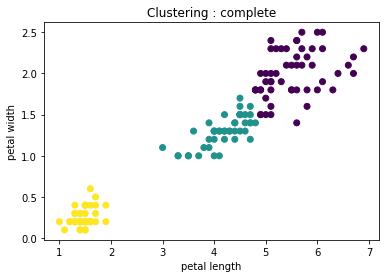

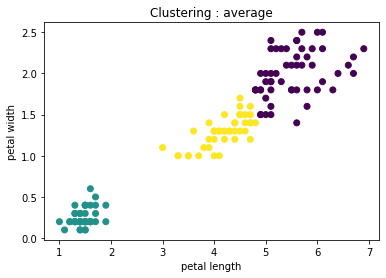

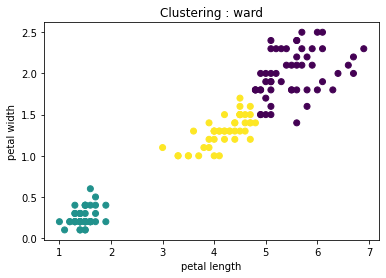

In [13]:
from sklearn.cluster import AgglomerativeClustering

linkage = ["complete", "average", "ward"]
for idx, i in enumerate(linkage):
    plt.figure(idx)
    hier = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage= i)
    hier.fit(iris_data_pd.iloc[:,2:4])
    plt.scatter(iris_data_pd.iloc[:,2],iris_data_pd.iloc[:,3],c=hier.labels_ )
    plt.title("Clustering : "+i)
    plt.xlabel('petal length')
    plt.ylabel('petal width')
plt.show()

- 트리를 어떻게 그렸는지 확인해보기 위해 scipy 패키지를 사용 --> 클러스터링 하고 tree를 그림

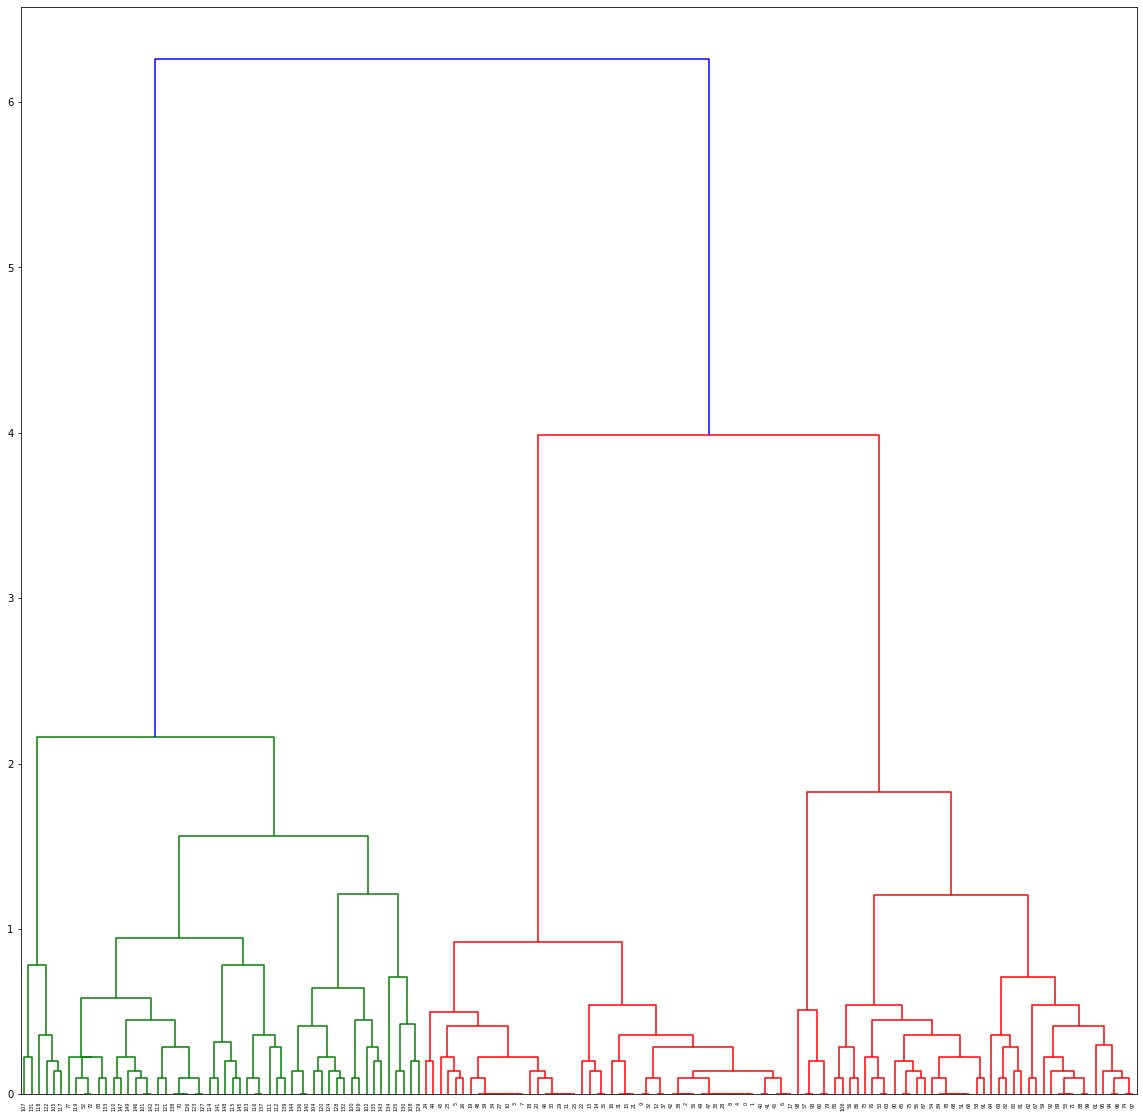

In [14]:
from scipy.cluster import hierarchy

hierar = hierarchy.linkage(iris_data_pd.iloc[:,2:4], 'complete')
plt.figure(figsize=(20,20))
dn = hierarchy.dendrogram(hierar)

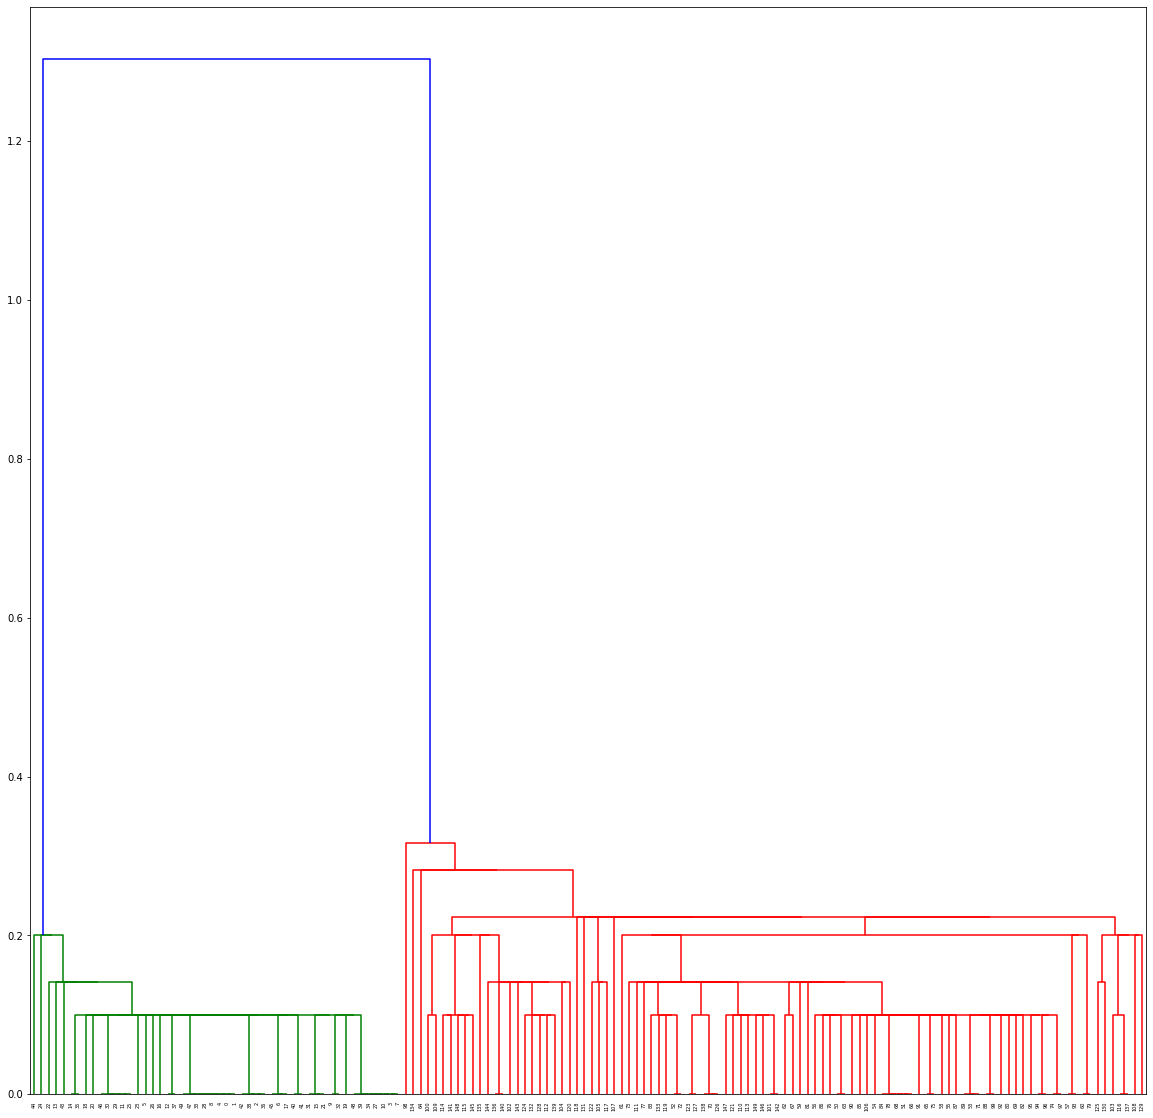

In [15]:
hierar = hierarchy.linkage(iris_data_pd.iloc[:,2:4], 'single')
plt.figure(figsize=(20,20))
dn = hierarchy.dendrogram(hierar)

## Wholesale 실습

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving Wholesale customers data.csv to Wholesale customers data.csv


In [3]:
data = pd.read_csv('Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
from sklearn.preprocessing import normalize

data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


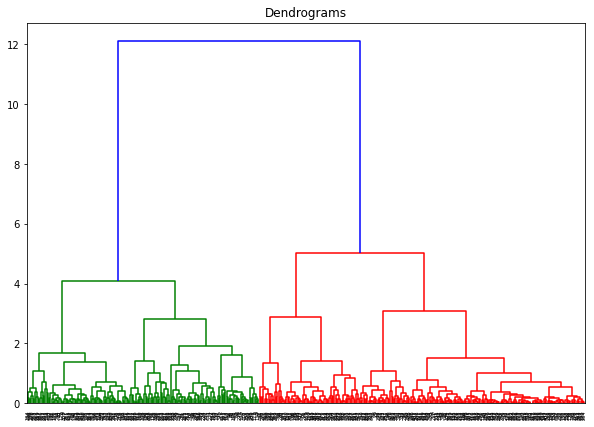

In [6]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,7))
plt.title ('Dendrograms')
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

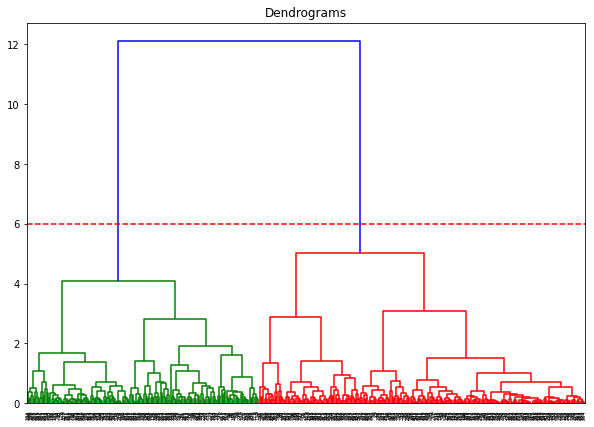

In [7]:
plt.figure(figsize=(10,7))
plt.title ('Dendrograms')
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [8]:
from sklearn.cluster import AgglomerativeClustering

clusters = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
clusters.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

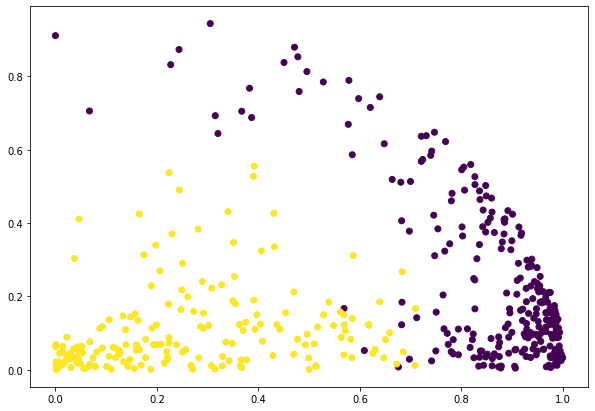

In [10]:
plt.figure(figsize=(10,7))
plt.scatter(data_scaled['Fresh'], data_scaled['Frozen'], c=clusters.labels_)

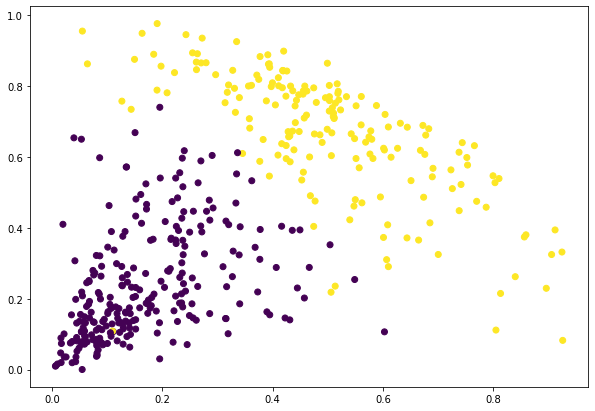

In [11]:
plt.figure(figsize=(10,7))
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=clusters.labels_)